In [1]:
import pandas as pd
import numpy as np
import thecannon as tc


C:\Users\nadir\PycharmProjects\ASTR8001\test_cannon_andy-demo-2025may\thecannon\plot.py:146: SyntaxWarning: invalid escape sequence '\c'
  label_index, label_names=label_names, mul="\cdot", pow="^"


In [2]:
# Load datasets (labels/spectra/config); Add label and apply feature transforms (e.g., log, CHL/CAR).
LUC_labels  = pd.read_csv('PROSPECT_input.csv')
LUC_spectra = pd.read_csv('PROSPECT_LUT.csv')
prospect_spectra = np.array(LUC_spectra).T
prospect_spectra_ivar = (100./prospect_spectra)**2.0 # SNR 100
prospect_wavelength = np.arange(400,2501,1)
LUC_labels['CHL/LMA'] = LUC_labels['CHL']/LUC_labels['LMA']
LUC_labels['log(EWT)xN'] = np.log(LUC_labels['EWT'])*LUC_labels['N']
bounds = [[-0.03,0.07],[-0.03,0.09],[-1,7],[-55,130],[-22,62],[-1,8.1]]
labels_default = ['EWT','LMA','N','CHL','CAR','ANT']

In [ ]:
# Train based on baseline data
prospect_labels_default = np.array(LUC_labels[labels_default])
vec = tc.vectorizer.PolynomialVectorizer(list(labels_default), 2)
prospect_model_default = tc.CannonModel(
    prospect_labels_default,
    prospect_spectra, prospect_spectra_ivar,
    vectorizer=vec,dispersion=prospect_wavelength)
prospect_theta, prospect_s2, prospect_metadata = prospect_model_default.train(threads=1)
prospect_test_labels_default, prospect_test_cov, prospect_metadata = prospect_model_default.test(prospect_spectra, prospect_spectra_ivar)

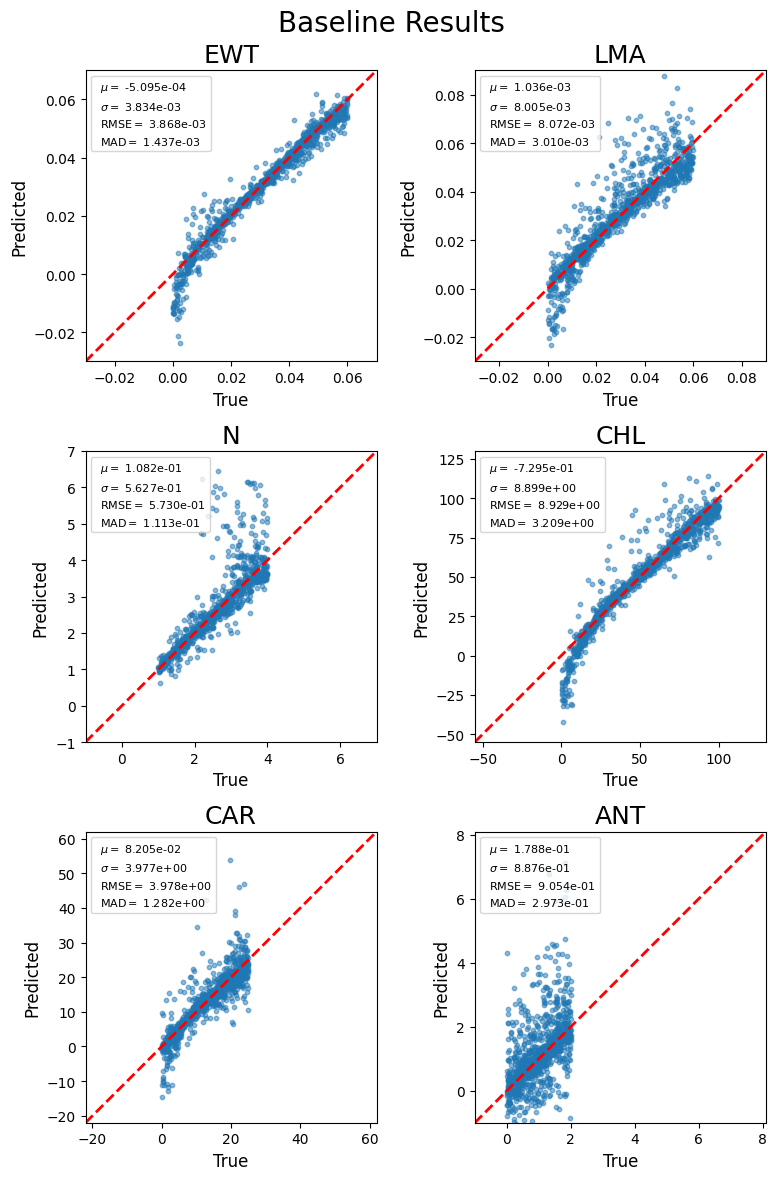

In [4]:
# Visualise results/diagnostics
tc.plot.one_to_one_updated(np.array(LUC_labels[labels_default]), prospect_test_labels_default, bounds=bounds, suptitle='Baseline Results')

In [ ]:
# Add CHL/LMA term to the vectorizer
labels_1 = ['EWT','LMA','N','CHL','CAR','ANT','CHL/LMA']
prospect_labels_1 = np.array(LUC_labels[labels_1])
vec = tc.vectorizer.PolynomialVectorizer(list(labels_1), 2)
prospect_model_1 = tc.CannonModel(
    prospect_labels_1,
    prospect_spectra, prospect_spectra_ivar,
    vectorizer=vec,dispersion=prospect_wavelength)
prospect_theta, prospect_s2, prospect_metadata = prospect_model_1.train(threads=1)
prospect_test_labels_1, prospect_test_cov, prospect_metadata = prospect_model_1.test(prospect_spectra, prospect_spectra_ivar)

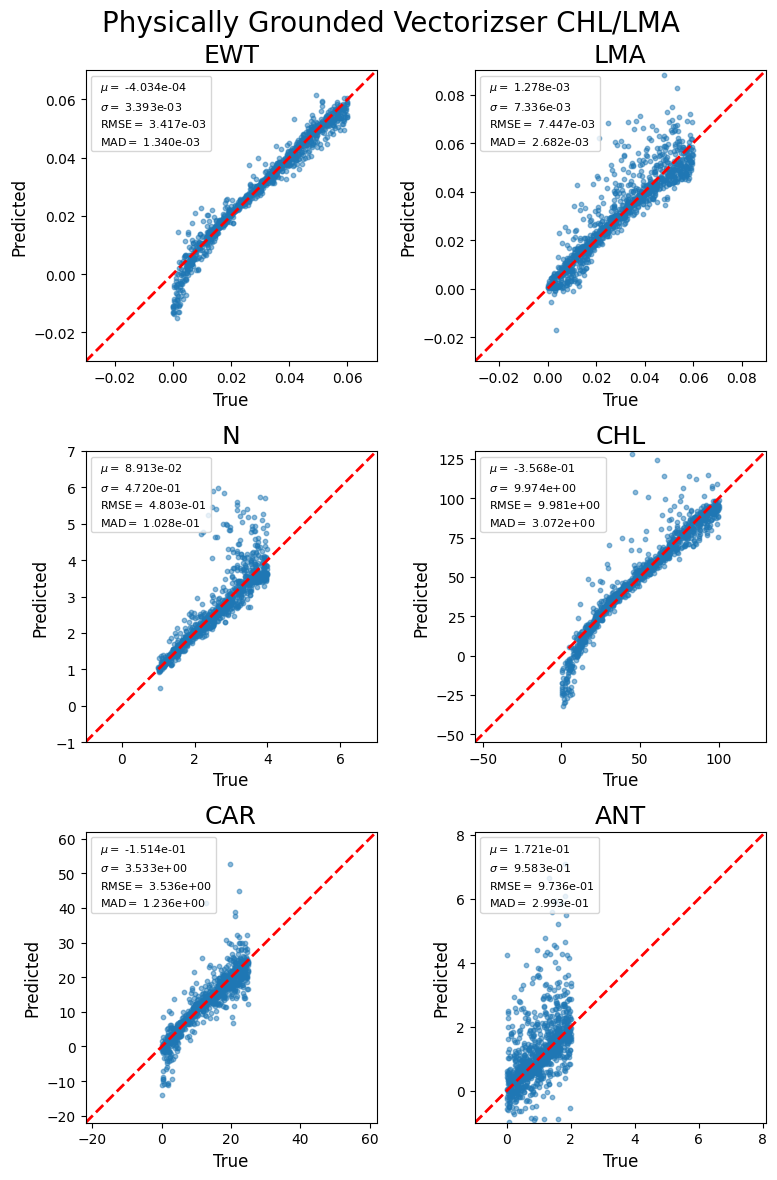

In [6]:
# Visualise results/diagnostics
tc.plot.one_to_one_updated(np.array(LUC_labels[labels_default]), prospect_test_labels_1, bounds=bounds, suptitle='Physically Grounded Vectorizser CHL/LMA')

In [ ]:
# Add log(EWT)xN term to the vectorizer
labels_2 = ['EWT','LMA','N','CHL','CAR','ANT','log(EWT)xN']
prospect_labels_2 = np.array(LUC_labels[labels_2])
vec = tc.vectorizer.PolynomialVectorizer(list(labels_2), 2)
prospect_model_2 = tc.CannonModel(
    prospect_labels_2,
    prospect_spectra, prospect_spectra_ivar,
    vectorizer=vec,dispersion=prospect_wavelength)
prospect_theta, prospect_s2, prospect_metadata = prospect_model_2.train(threads=1)
prospect_test_labels_2, prospect_test_cov, prospect_metadata = prospect_model_2.test(prospect_spectra, prospect_spectra_ivar)

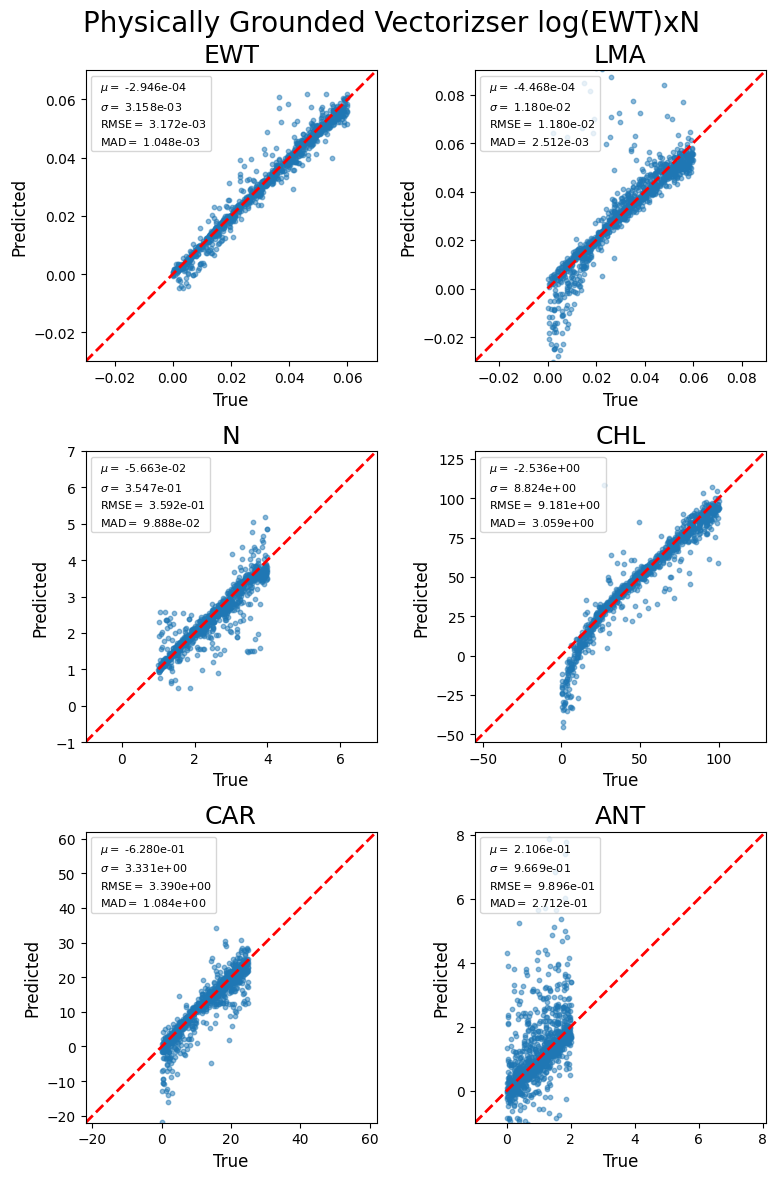

In [8]:
# Visualise results/diagnostics
tc.plot.one_to_one_updated(np.array(LUC_labels[labels_default]), prospect_test_labels_2, bounds=bounds, suptitle='Physically Grounded Vectorizser log(EWT)xN')

In [ ]:
# Add both CHL/LMA and log(EWT)xN terms to the vectorizer
labels_3 = ['EWT','LMA','N','CHL','CAR','ANT','CHL/LMA','log(EWT)xN']
prospect_labels_3 = np.array(LUC_labels[labels_3])
vec = tc.vectorizer.PolynomialVectorizer(list(labels_3), 2)
prospect_model_3 = tc.CannonModel(
    prospect_labels_3,
    prospect_spectra, prospect_spectra_ivar,
    vectorizer=vec,dispersion=prospect_wavelength)
prospect_theta, prospect_s2, prospect_metadata = prospect_model_3.train(threads=1)
prospect_test_labels_3, prospect_test_cov, prospect_metadata = prospect_model_3.test(prospect_spectra, prospect_spectra_ivar)

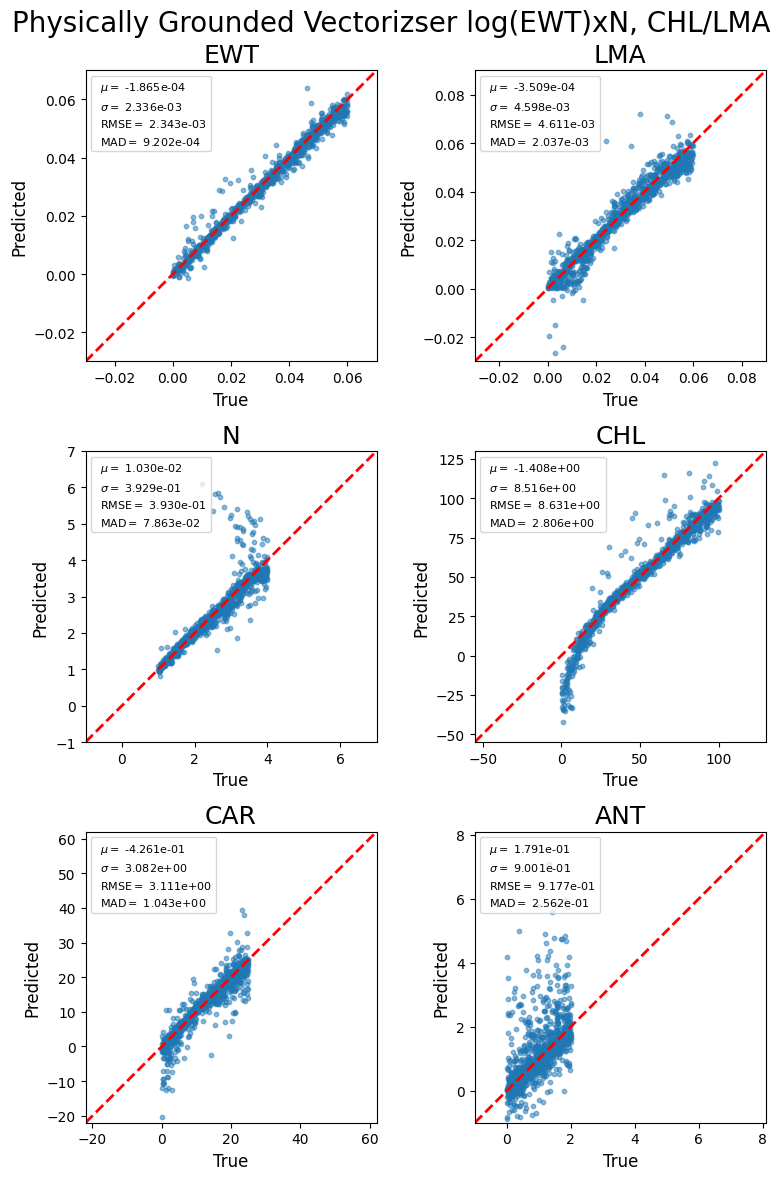

In [10]:
# Visualise results/diagnostics
tc.plot.one_to_one_updated(np.array(LUC_labels[labels_default]), prospect_test_labels_3, bounds=bounds, suptitle='Physically Grounded Vectorizser log(EWT)xN, CHL/LMA')